##  Natural Language Processing

This Natural Language Processing notebook was build to determine the label of the text comment from the twitter.  The data gathered from the twitter is labeled in 5 different emotion: anger, happy, sadness, love, fear

Import needed library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [2]:
data = pd.read_csv('Twitter_Emotion_Dataset.csv')

In [3]:
data.label.unique()

array(['anger', 'happy', 'sadness', 'love', 'fear'], dtype=object)

In [4]:
data.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [5]:
import re

In [6]:
def clean_text(x):
    letter_only= re.sub("[^a-zA-Z]"," ",x)
    return ' '.join(letter_only.split()).lower()

In [7]:
data['cleantweet'] = data['tweet'].apply(clean_text)
data['cleantweetlength'] = data['cleantweet'].apply(lambda x:len(x))
count_vectorizer_transformer = CountVectorizer().fit(data['cleantweet'])
count_vectorizer_res = count_vectorizer_transformer.transform(data['cleantweet'])
tf_idf_transformer = TfidfTransformer().fit(count_vectorizer_res)
tf_idf_res = tf_idf_transformer.transform(count_vectorizer_res)
df_tf_idf = pd.DataFrame(tf_idf_res.todense(), columns=count_vectorizer_transformer.get_feature_names())

In [8]:
meaningfull_words = []
for item in range (len(data)):
    words = list(df_tf_idf.iloc[item].sort_values(ascending=False).head(3).index)
    meaningfull_words.append(words)

In [9]:
data['meaningful words']=meaningfull_words

In [10]:
from nltk.corpus import stopwords

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from collections import Counter

In [13]:
def show_most_words_appear(data):
    all_words = ' '.join(list(data))
    list_all_words =all_words.split()
    word_count = Counter(list_all_words)
    word_count_series = pd.Series(word_count)
    word_wo_stopwords = []
    for item in word_count_series.index:
        if (item not in stopwords.words('indonesian')):
            word_wo_stopwords.append(item)
    word_count_series = word_count_series.loc[word_wo_stopwords]
    most_words_appear = word_count_series.sort_values(ascending=False).head(20)
    plt.figure(figsize=(15,5))
    sns.barplot(most_words_appear.index,most_words_appear.values)

anger
happy
sadness
love
fear


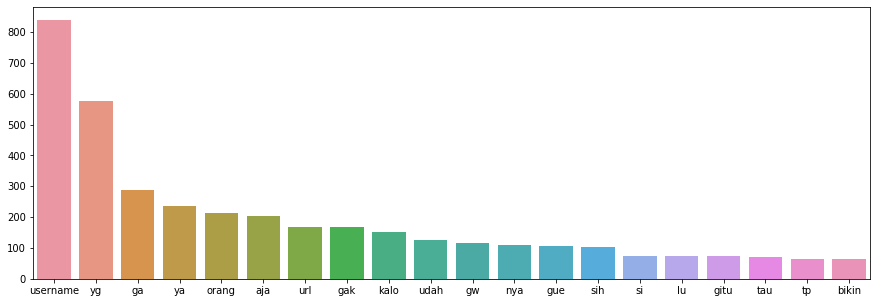

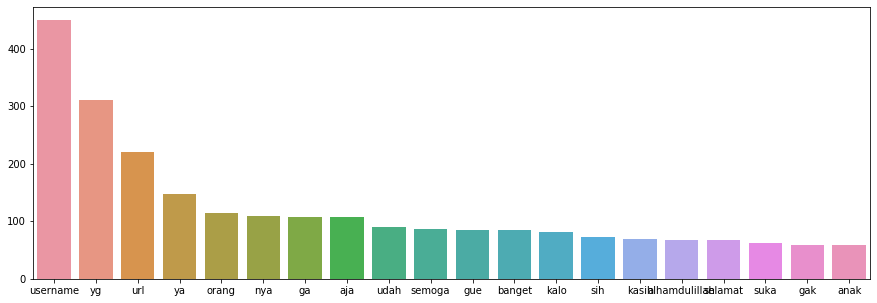

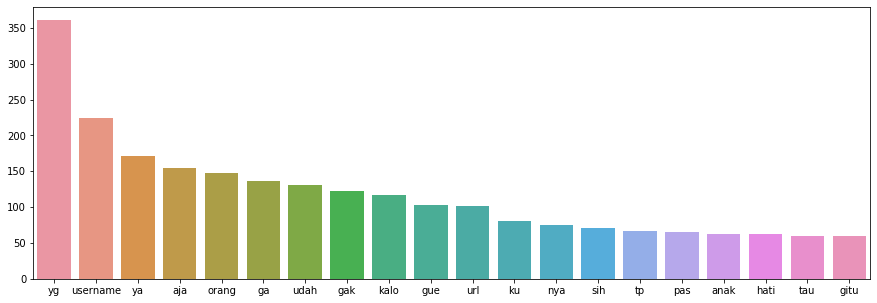

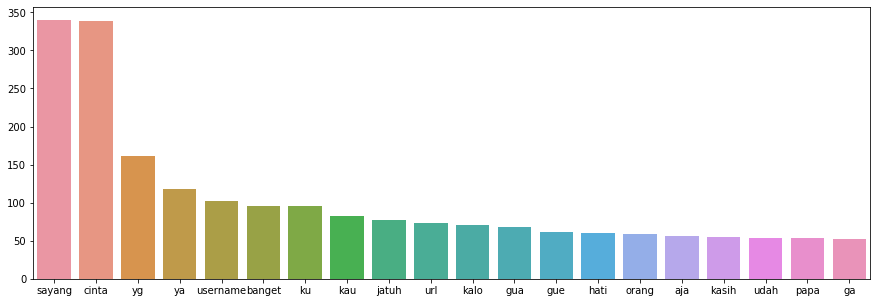

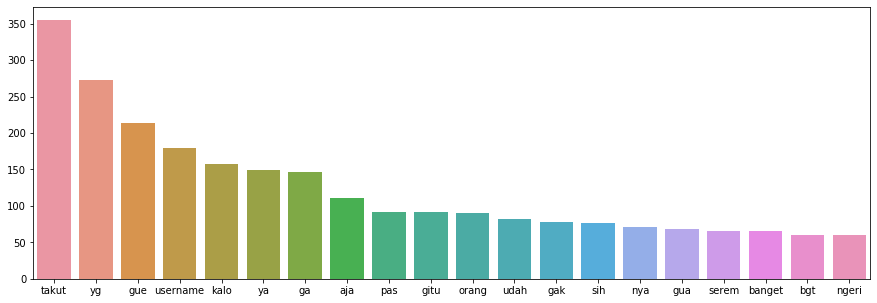

In [14]:
unik = data.label.unique()
for item in unik:
    print(item)
    show_most_words_appear(data[data['label']==item]['cleantweet'])
    

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [16]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_res, data['label'])

In [17]:
model_1 = MultinomialNB().fit(X_train, y_train)
prediction = model_1.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

       anger       0.51      0.87      0.65       287
        fear       1.00      0.19      0.32       155
       happy       0.58      0.53      0.55       237
        love       0.91      0.32      0.47       155
     sadness       0.44      0.52      0.48       267

    accuracy                           0.54      1101
   macro avg       0.69      0.49      0.49      1101
weighted avg       0.64      0.54      0.52      1101



In [18]:
mes = 'hei sayang lagi apa'
cv = count_vectorizer_transformer.transform([mes])
tf = tf_idf_transformer.transform(cv)
model_1.predict(tf)

array(['love'], dtype='<U7')

In [19]:
def text(enter):
    mes = enter
    cv = count_vectorizer_transformer.transform([mes])
    tf = tf_idf_transformer.transform(cv)
    model_1.predict(tf)
    return model_1.predict(tf)

In [20]:
text('dasar kau gila')

array(['anger'], dtype='<U7')

In [21]:
text('aku sayang kamu')

array(['love'], dtype='<U7')

In [22]:
text('serem ih gue takut')

array(['fear'], dtype='<U7')

In [23]:
text('keuntungan yang luar biasa')

array(['happy'], dtype='<U7')

In [24]:
text('ngga tega gue dengernya')

array(['sadness'], dtype='<U7')